In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [5]:
def elbowOptimizer(data):
    """Plots a Elbow Chart on the data provided"""
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show();

In [6]:
def kmeansTrainer(numberOfClusters, data):
    """
    Trains KMeans Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    kmeans = KMeans(n_clusters=numberOfClusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)
    return (kmeans,labels)

In [7]:
X1 = df.iloc[:, [2,3]].values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


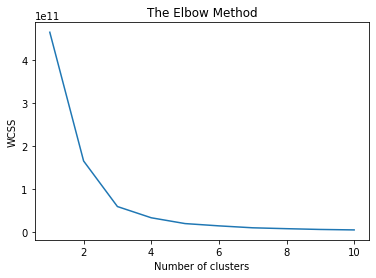

In [8]:
elbowOptimizer(X1)

In [9]:
kmeans, labels = kmeansTrainer(3, X1)

In [10]:
def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel, model_type):
    """Plots Scatter Plot for the clusters on the Data given"""
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1 ], s=100, c=color[i], label ='Cluster '+str(i+1))
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')   
    plt.title('Clusters of customers using '+model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

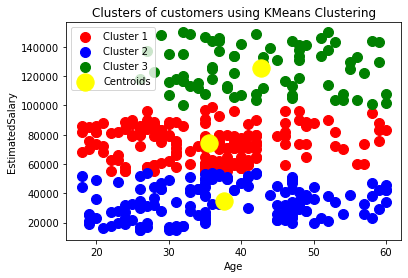

In [11]:
clusterVisualiser(X1, kmeans, 3, labels,
                  'Age', 'EstimatedSalary', 'KMeans Clustering')

In [15]:
df.EstimatedSalary.mean()

69742.5